# Bilayer Graphene

When two planes of graphene are stacked on top of each other, at certain twist angles, the electronic properties of the material change. 

In [0]:
!pip install sisl

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import numpy.linalg as la
import cmath
from google.colab import files
from __future__ import print_function
import sisl
from sisl import *
from IPython.display import Image
import os
import random
import skimage.data
import skimage.transform
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

## Stacking

In the image below, we can see the different types of stacking for bilayer graphene, depending on what type of atom is placed on top of which. 

![Bilayer Stacking](https://3c1703fe8d.site.internapcdn.net/newman/csz/news/800/2017/scientistsso.jpg)

## Moire Pattern with degree variations

Below we have an animation of how the Moire pattern of graphene varies with angle of rotation between layers. The angle 1.1 degrees is considered a "Magic Angle", due to a flat band arising when the two layers are rotated. 

![](https://i.makeagif.com/media/3-08-2018/FC3HmP.gif)

# AA Stacking

As seen in the figure below, AA stacking refers to the two layers of graphene stacked perfectly on top of each other. Even though in a graphene sheet all atoms are C, they can be classified into A and B types. Apart from the hopping integral between nearest neighbours within a layer, we need to consider the value of the hopping integral between layers. We will only consider $\gamma$ as the value between atoms directly on top/beneath each other. 

![](https://cdn.iopscience.com/images/2053-1591/3/5/055005/Full/mrxaa211df1_lr.jpg)


Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
}
[[ 0.    0.    0.  ]
 [ 1.42  0.    0.  ]
 [ 0.    0.   14.2 ]
 [ 1.42  0.   14.2 ]]


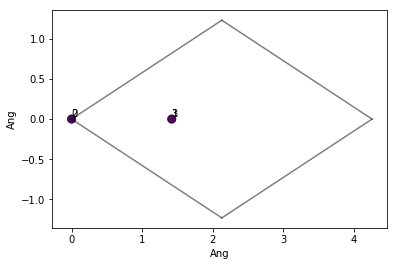

In [0]:
aa = sisl.geom.graphene().tile(1,0).tile(2,2)

#gnr.tile(reps = 20,axis=1)

print(aa)

plot(aa,atom_indices= True)

print(aa.xyz)

xarray = aa.xyz[:,0]

yarray = aa.xyz[:,1]

zarray = aa.xyz[:,2]






In [0]:
print(xarray)
print(zarray)

[0.   1.42 0.   1.42]
[ 0.   0.  14.2 14.2]


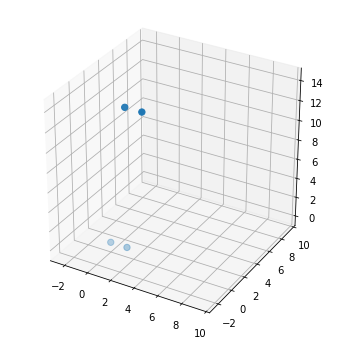

In [0]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,6))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, s = 40)
plt.xlim(-3, 10)
plt.ylim(-3, 10)

plt.gca().set_aspect('equal', adjustable='box') 
plt.draw()

In [0]:
#calculation the band structure of bilayer graphene

#we first construct a blank canvas for the Hamiltonian

H = Hamiltonian(aa)


#now we need to set its values 

for ia,io in H:
  idx = H.geom.close(ia, R = [0.1, 1.43])
  
  H[io, idx[0]] = 0
  H[io, idx[1]] = -2.7 #this is the hopping integral within layers

H[0,2] = -0.4
H[2,0] = -0.4
H[1,3] = -0.4
H[3,1] = -0.4

  #hopping integrals between layers 
  
  
    
    
    
print(H)



Hamiltonian{non-zero: 20, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 4, no: 4,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 4,
  },
  maxR: 1.43420,
  SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
 }
}


In [0]:
band = BandStructure(H, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])


eigs = band.eigh()

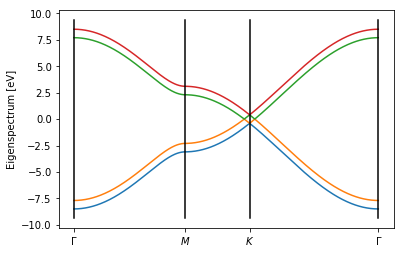

In [0]:
xtick, xtick_label = band.lineartick() #points where the band undergoes changes 
lk = band.lineark() 
plt.plot(lk, eigs)

plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')


## AB Stacking

For AB Stacking, we need to use 4 $\gamma$ parameters. $\gamma _0 = 2.7 eV$, $\gamma_1 = 0.4 eV$, $\gamma_3 = 0.3 eV$, $\gamma_4 = 0.04 eV$

![](https://www.researchgate.net/profile/Stephan_Haas2/publication/230613680/figure/fig1/AS:393580871995415@1470848401009/Bilayer-graphene-with-AB-stacking-a1-b1-are-the-two-sublattice-sites-in-the-upper.png)



[[0.   0.   0.  ]
 [1.42 0.   0.  ]]
[[ 2.13        1.22975607  0.        ]
 [ 2.13       -1.22975607  0.        ]
 [ 1.42        0.         14.2       ]]
Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
}
[[ 0.    0.    0.  ]
 [ 1.42  0.    0.  ]
 [ 1.42  0.   14.2 ]
 [ 2.84  0.   14.2 ]]


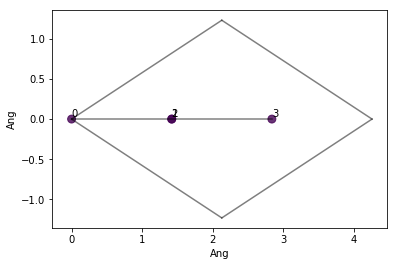

In [0]:
ab = sisl.geom.graphene()

print(ab.xyz)

#we set the 3rd lattice vector (z-direction) to a particular value

ab.cell[2,:] =[1.42, 0 , 14.2]

print(ab.cell)
#gnr.tile(reps = 20,axis=1)

ab2 = ab.tile(2,2)
print(ab2)


plot(ab2,atom_indices= True)

print(ab2.xyz)

xarray = ab2.xyz[:,0]

yarray = ab2.xyz[:,1]

zarray = ab2.xyz[:,2]


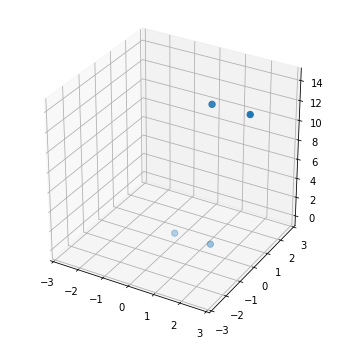

In [0]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,6))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, s = 40)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.gca().set_aspect('equal', adjustable='box') 
plt.draw()

In [0]:
#calculation the band structure of bilayer graphene AB STACKING 

#we first construct a blank canvas for the Hamiltonian

H = Hamiltonian(ab2)


#now we need to set its values 

for ia,io in H:
  idx = H.geom.close(ia, R = [0.1, 1.43])
  
  H[io, idx[0]] = 0
  H[io, idx[1]] = -2.7 #this is the hopping integral within layers

 #hopping integrals between layers 


H[0,2] = -0.3
H[2,0] = -0.3
H[1,2] = -0.4
H[2,1] = -0.4
H[1,3] = -0.3
H[3,1] = -0.3

'''#gamma 4
H[0, 1, (-1, 0)] = -0.04
H[0, 1, (0, -1)] = -0.04
H[1, 0, (1, 0)] = -0.04
H[1, 0, (0, 1)] = -0.04


  '''
  
    
    
    
print(H)

Hamiltonian{non-zero: 22, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 4, no: 4,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 4,
  },
  maxR: 1.43420,
  SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
 }
}


In [0]:
band = BandStructure(H, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])


eigs = band.eigh()

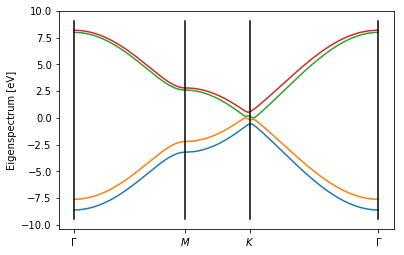

In [0]:
xtick, xtick_label = band.lineartick() #points where the band undergoes changes 
lk = band.lineark() 
plt.plot(lk, eigs)

plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')
